# Assignment for Day 24:

## Project-1: Build Decision Tree(DV-"Survived",IDV-"Age,Gender and Fare") and Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelBinarizer

In [2]:
DS_PATH="../datasets/train.csv"
def load_titanic_dataset(path=DS_PATH):
    return pd.read_csv(path)

In [3]:
titanic_ds = load_titanic_dataset()
titanic_ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_ds.Sex.value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [5]:
titanic_ds['Sex'] = LabelBinarizer().fit_transform(titanic_ds['Sex'])
X_prepared = pd.DataFrame([titanic_ds.Sex, titanic_ds.Age, titanic_ds.Fare]).T
X_prepared.head()

,Sex,Age,Fare
0,1.0,22.0,7.2500
1,0.0,38.0,71.2833
2,0.0,26.0,7.9250
3,0.0,35.0,53.1000
4,1.0,35.0,8.0500


In [6]:
tree_model = DecisionTreeClassifier(max_depth=8)

tree_model.fit(X=X_prepared, y=titanic_ds.Survived)

DecisionTreeClassifier(max_depth=8)

In [7]:
export_graphviz(tree_model, out_file="titanictree.dot")

In [8]:
tree_model.score(X_prepared, titanic_ds.Survived)

0.8706411698537683

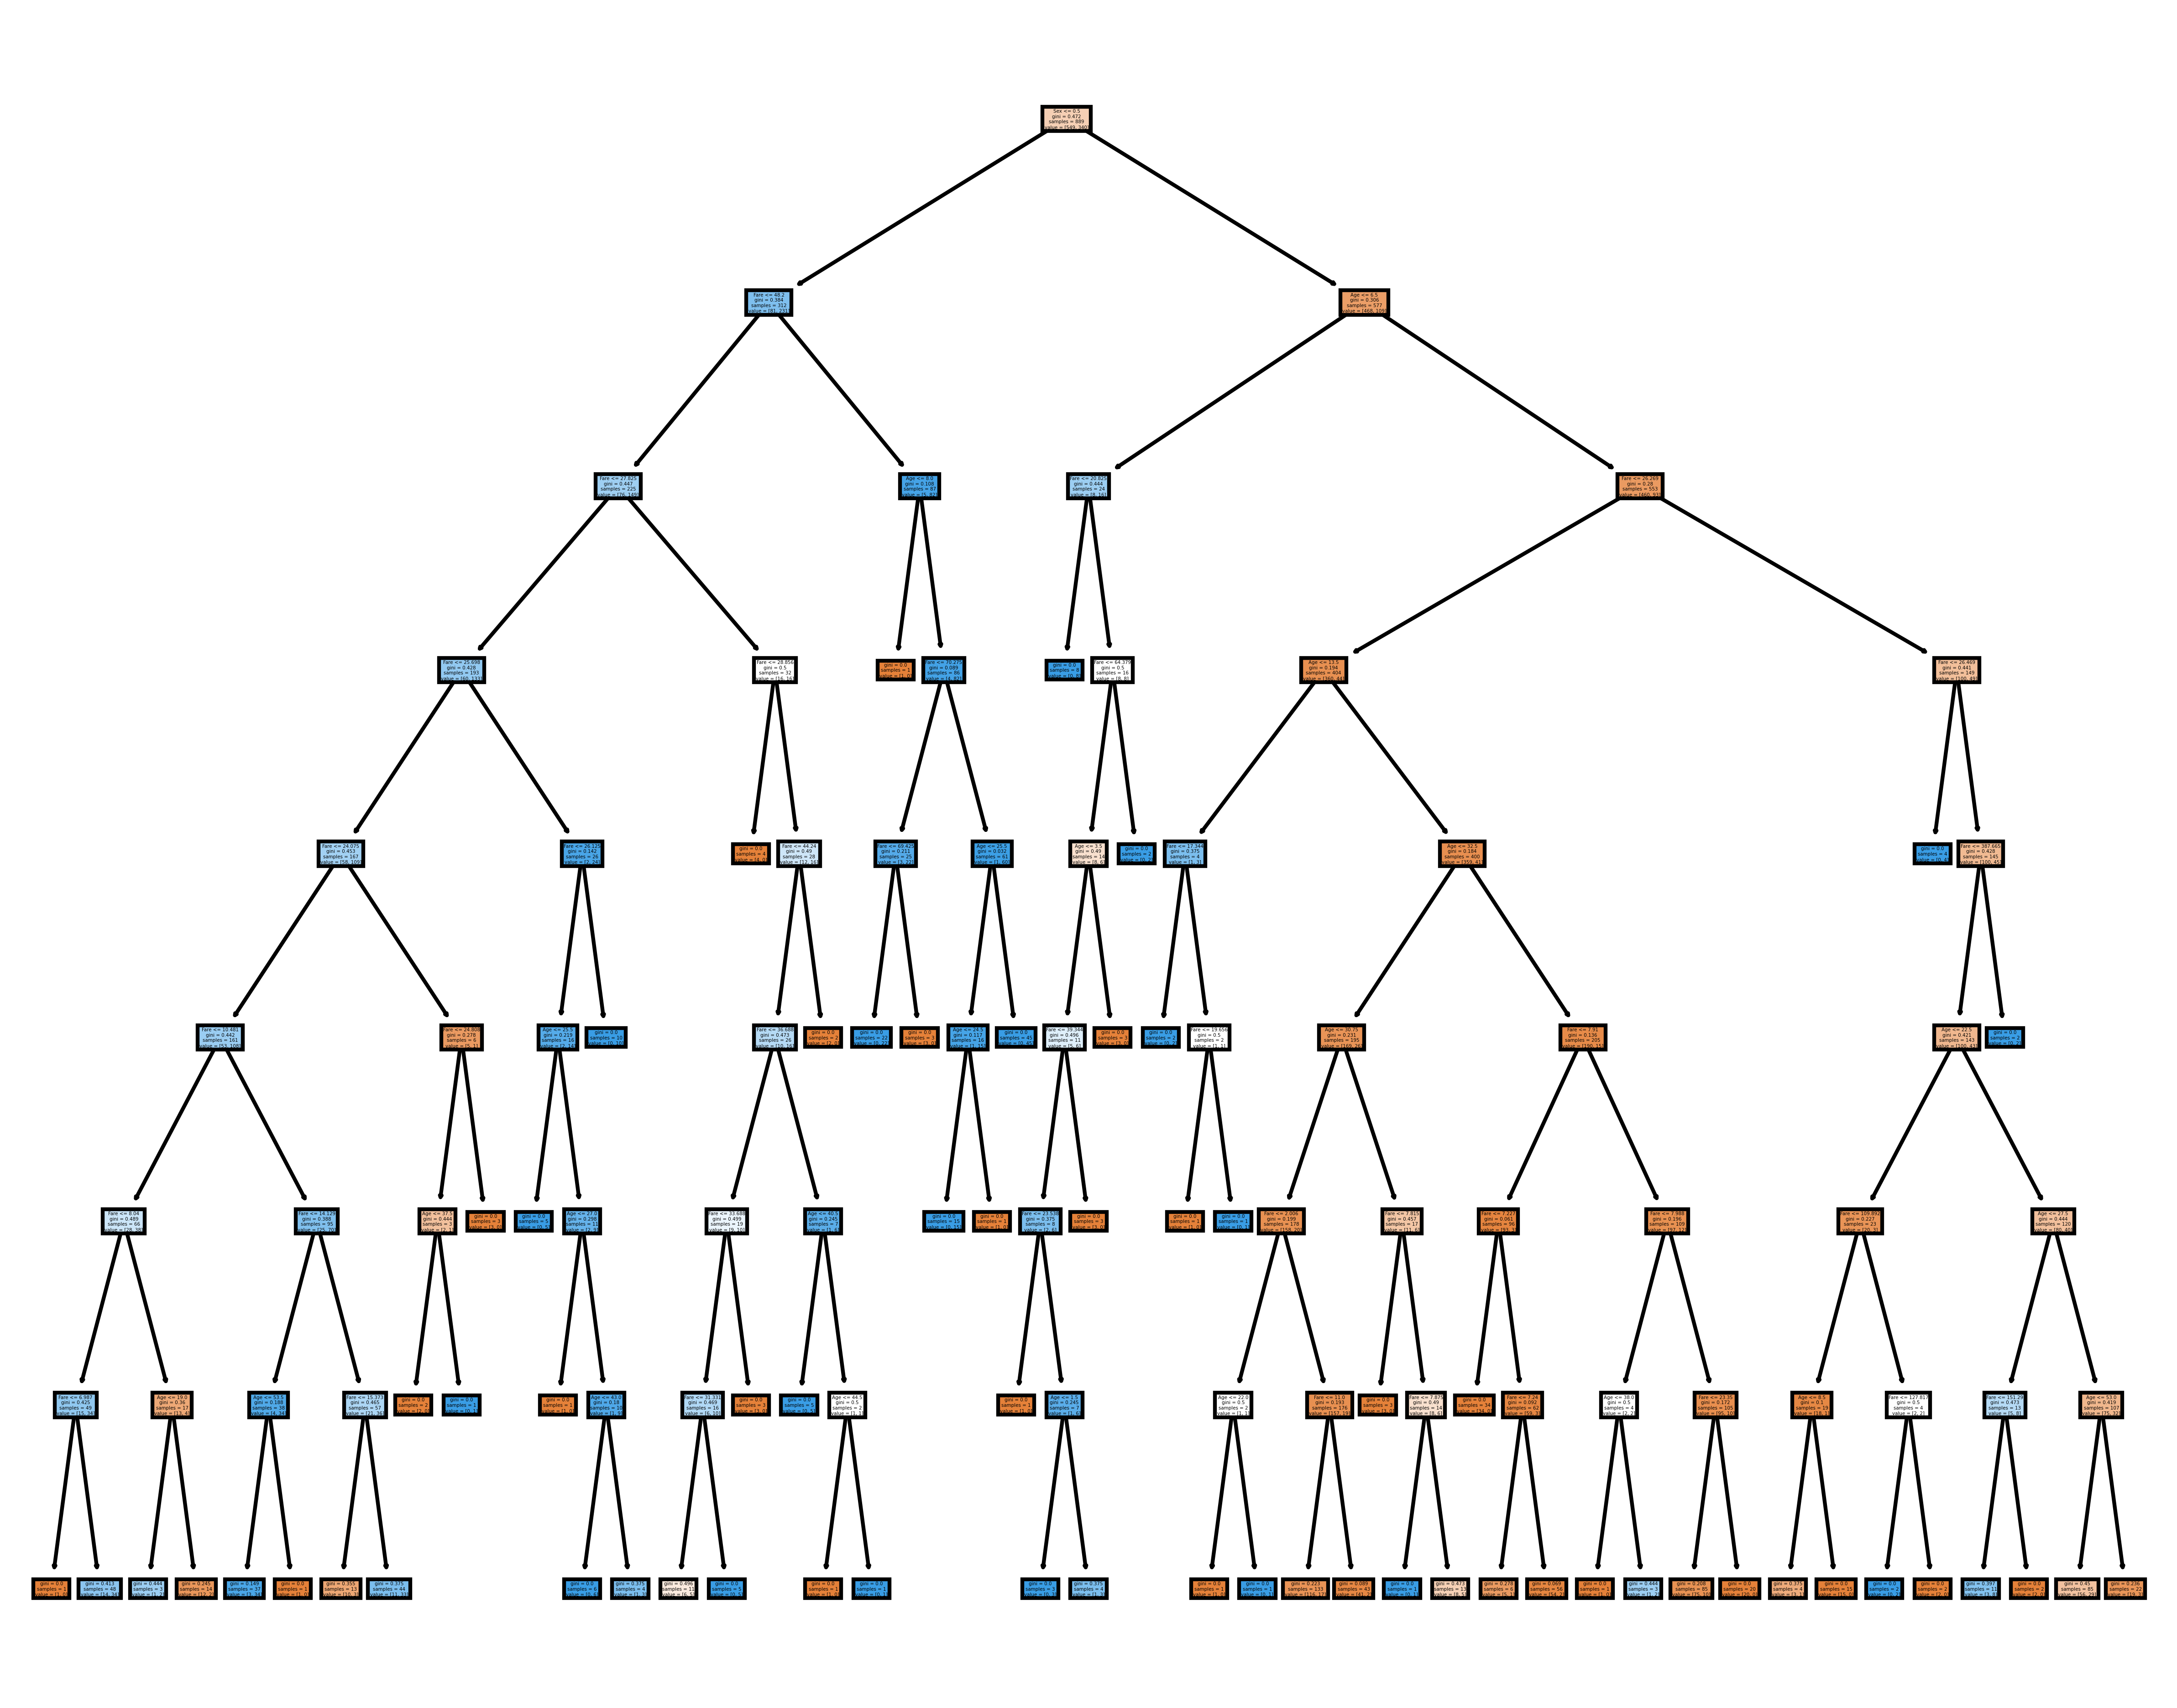

In [9]:
fn =["Sex", "Age", "Fare"]

fig, axs = plt.subplots(1, 1, figsize=(10, 8), dpi=600)

plot_tree(tree_model, feature_names=fn, filled=True);

fig.savefig("titanictree.png")